In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('C:/Users/conno/OneDrive/Desktop/STAT 8230 - Applied Multivariate Data Analysis/Homework/Homework 4/24psychtests.csv')

In [ ]:
#2. (Clustering individuals: 24 Psy. Tests) Use the raw data (tests 1-24) 
#and the combined 301 students from both schools to find clusters of 
#students. Ignoring the fact that the data are actually labeled by the 
#name of the school they attend, cluster the 301 individuals into two 
#groups. You are asked
#  to decide whether you want to standardize the data,
#  to choose a good dissimilarity measure, and
#  to use a clustering algorithm among those we have discussed during 
#    lectures.
#Discuss your result.
#(Optional: Are there really two clusters?)

In [8]:
data2 = data.drop(columns=["Case","Sex","Age","Grp","V25","V26","group"])

In [11]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [12]:
#  to decide whether you want to standardize the data,
# yes, the ranges of the variables are very different so standardization would be helpful.
from sklearn.preprocessing import MinMaxScaler
x = data2.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.34042553, 0.78571429, 0.31578947, 0.02941176, 0.42105263,
        0.36842105, 0.79166667, 0.36363636, 0.19047619, 0.34042553,
        0.55555556, 0.38848921, 0.55364807, 0.63636364, 0.40909091,
        0.62295082, 0.23076923, 0.45      , 0.76470588, 0.2       ,
        0.56521739, 0.62790698, 0.1025641 , 0.54166667],
       [0.59574468, 0.42857143, 0.31578947, 0.44117647, 0.34210526,
        0.26315789, 0.33333333, 0.36363636, 0.19047619, 0.40425532,
        0.65656566, 0.46043165, 0.79399142, 0.81818182, 0.38636364,
        0.68852459, 0.46153846, 0.6       , 0.41176471, 0.14285714,
        0.52173913, 0.3255814 , 0.        , 0.04166667],
       [0.4893617 , 0.42857143, 0.31578947, 0.38235294, 0.15789474,
        0.15789474, 0.125     , 0.06060606, 0.04761905, 0.31914894,
        0.3030303 , 0.12230216, 0.25321888, 0.63636364, 0.38636364,
        0.60655738, 0.03846154, 0.25      , 0.17647059, 0.14285714,
        0.34782609, 0.25581395, 0.15384615, 0.375     ],
       [0.595

In [14]:
import scipy
leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [15]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

<ipython-input-15-8655000d21de>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [16]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 84,  86,   6, 104, 122,  86,  10, 117,  98, 108, 109,  57,  48,
       108,  27, 106,  86, 112,  19,  57,  75,  30,  94, 107, 108,  48,
        41, 120,  40, 106, 107,   7, 104,  92,   6, 105,  56, 118,  32,
        70,  47, 105,   8, 113,  63,  71,  23,  86, 114,  82,  75, 117,
         4,  98,  48, 118, 120,  67, 111,   5,  25,  57, 110,  50,  71,
        32,  42, 118, 121, 122,  87,  74, 114,  45, 113, 111,  64,   3,
        29,  79,  80,  24,  79, 113,   9,  37,  47,  55,  73,  91,  78,
        43, 111, 121,  98,  45,  85,  39,  86,  55,  43,  51,  54,  97,
        22,  25,  33,  40,  33, 102,  67,  45,  30,  55,  74,  91,  53,
        78, 117, 119,  46, 116,  21,  76,  24,  42,  99,  99,  26, 114,
        19,  46,   3, 119,  57,  28,  69,  52,  29,  12,  34,  73,  27,
         1,  88, 100,  31, 110,  39,  72,  21,  64,  65, 114, 122,  96,
       105,  51,  70,  65,  54,  50,   1,  91,  99,  96, 102,  77,  51,
        87,  68, 102,  69,  39,  50,  37, 108,  37,  60,  13,  9

In [17]:
from scipy.cluster.hierarchy import fcluster
k = 2
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [19]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         1.1234596  1.34649998 ... 1.21140099 1.06255512 1.67194781]
 [1.1234596  0.         1.14932737 ... 1.47799633 1.39059244 1.78731604]
 [1.34649998 1.14932737 0.         ... 1.98926972 1.40483874 2.22810871]
 ...
 [1.21140099 1.47799633 1.98926972 ... 0.         1.35785618 1.18520447]
 [1.06255512 1.39059244 1.40483874 ... 1.35785618 0.         1.55401351]
 [1.67194781 1.78731604 2.22810871 ... 1.18520447 1.55401351 0.        ]]


In [20]:
agglom = AgglomerativeClustering(n_clusters = 2, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]

In [21]:
data2['cluster_'] = agglom.labels_
data2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,cluster_
0,20,31,12,3,40,7,23,22,9,78,...,96,6,9,16,3,14,34,5,24,1
1,32,21,12,17,34,5,12,22,9,87,...,100,12,12,10,-3,13,21,1,12,1
2,27,21,12,15,20,3,7,12,3,75,...,95,1,5,6,-3,9,18,7,20,1
3,32,31,16,24,42,8,18,21,17,69,...,91,5,3,10,-2,10,22,6,19,1
4,29,19,12,7,37,8,16,25,18,85,...,104,15,14,14,29,15,19,4,20,0


In [31]:
sum(abs((data["Grp"]-1)-(data2['cluster_'])))

125

In [ ]:
#125 misclassifications

In [ ]:
#3. (Clustering variables: 24 Psy. Tests) Use the raw data (tests 1-24) 
#and the combined 301 students from both schools to find clusters of 24 
#tests. To cluster variables, use the 1-correlation dissimilarity
#d(Vi; Vj ) = 1 - rho ij ;
#where rho ij is the sample correlation between the pair of the ith and 
#jth variables (tests). Perform agglomerative hierarchical clustering with 
#average linkage.

In [32]:
agglom = AgglomerativeClustering(n_clusters = 2, linkage = 'average')

In [33]:
agglom.fit(data2)

AgglomerativeClustering(linkage='average')

In [36]:
#3(a) Display your sequence of clustering assignments by dendrogram.
dist_matrix = distance_matrix(data2,data2) 
print(dist_matrix)

[[  0.          68.39590631  92.10863152 ...  80.28075735  92.93546148
  100.        ]
 [ 68.39590631   0.         142.74452704 ...  68.09552114 141.04254677
  134.63283403]
 [ 92.10863152 142.74452704   0.         ... 157.13370103  79.68061245
  127.60094044]
 ...
 [ 80.28075735  68.09552114 157.13370103 ...   0.         142.84257069
  108.26356728]
 [ 92.93546148 141.04254677  79.68061245 ... 142.84257069   0.
   92.60129589]
 [100.         134.63283403 127.60094044 ... 108.26356728  92.60129589
    0.        ]]


<ipython-input-37-90bcb3750f27>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


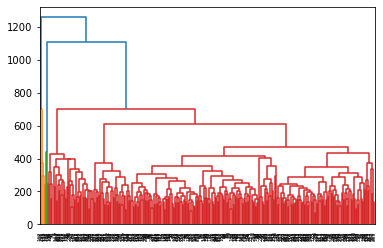

In [37]:
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)

In [ ]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

In [41]:
#3(b) Cluster the variables into four clusters. Discuss the result in 
#connection to the (rotated) factor loadings obtained in problem 2
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom.fit(data2)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [48]:
list_of_tuples = list(zip(agglom.labels_,data2['cluster_'])) 

In [50]:
compare = pd.DataFrame(list_of_tuples,columns = ["Problem 2", "Problem  3.b"])

In [51]:
compare.groupby(["Problem 2", "Problem  3.b"]).size().reset_index().rename(columns={0:'count'})

,Problem 2,Problem 3.b,count
0,0,0,5
1,1,1,3
2,2,0,141
3,2,1,146
4,3,0,2
5,3,1,4
